Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **43 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Adaobi Amanna"
COLLABORATORS = "Online search, Previous class"

---

# CS110 Pre-class Work - Randomly built BSTs

## Part A. Average number of comparisons when searching

## Question 0 [time estimate: 1 minute] 

Paste in the working code from last session's PCW for the class Node, which contains the methods for insertion, searching, and deletion. 



Hello Professor, for the last PCW, I did not really understand the work so my code was not running fine. I revisisted the class and modified my code based on in class activity, so it is different from the one from my previous PCW.

In [2]:
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val

    def insert(self, node):
        if self.data > node.data:
            if self.l_child is None:
                self.l_child = node
                node.parent = self
            else:
                self.l_child.insert(node)
        else:
            if self.r_child is None:
                self.r_child = node
                node.parent = self
            else:
                self.r_child.insert(node)
        return self
    
    def search(self, value):
        if( value > self.data):
            if(self.r_child != None):
                return self.r_child.search(value)
            else:
                return None
        elif (value < self.data):
            if(self.l_child != None):
                return self.l_child.search(value)
            else:
                return None
        else:
            if(self.data == value):
                return self
            else:
                return None
        
    def inorder(self):
        values = []
        
        if(self.r_child != None):
            values.extend(self.r_child.inorder())
        
        values.append(self.data)
        
        if(self.l_child != None):
            values.extend(self.l_child.inorder())
        
        return values
    
    def delete(self, value):
        def transplant(node1, node2):
            """
            replaces the subtree rooted at node1 with the subtree rooted at node2
            """
            nonlocal root
            if node1.parent == None:
                root = node2
            elif node1 == node1.parent.l_child:
                node1.parent.l_child = node2
            else:
                node1.parent.r_child = node2
            if node2 != None:
                node2.parent = node1.parent

        """if a node with data = value is present in the tree rooted at Node, deletes that node and returns the root"""
        root = self
        node = root.search(value)
        if node:
            if node.l_child is None:
                transplant(node, node.r_child)
            elif node.r_child == None:
                transplant(node, node.l_child)
            else:
                y = node.r_child.minimum() # y = minimum(node.r_child)
                if y.parent != node:
                    transplant(y, y.r_child)
                    y.r_child = node.r_child
                    y.r_child.parent = y
                transplant(node, y)
                y.l_child = node.l_child
                y.l_child.parent = y
        return root


## Question 1 [time estimate: 5 minutes]

Complete the following function that computes the depth of a given node in a BST identified by its root. Use the test below to make sure your code works properly (Optional: Why does the test work?)

In [47]:
def depth(root, node, cur_depth = 0):
    """
    Finds the depth of the node in a BST. depth of root is 0.

    Parameters
    ----------
    root 
        A node, the root of the BST
    node 
        A node to compute the depth of

    Returns
    -------
    d : int 
        Distance from node to root
        
    """
    #checks if depth ==0
    if root.data == node.data:
        return cur_depth 
    #checks node.data is less than root.data
    elif node.data < root.data:
        return depth(root.l_child, node, cur_depth+1)  
    
    else:
        return depth(root.r_child, node, cur_depth+1)

In [48]:
#import the math module
import math 
bst = None
nodes = [Node(15), Node(6), Node(18), Node(3), Node(7), 
         Node(17), Node(20), Node(2), Node(4)]
for node in nodes:
    if not bst:
        bst = node
    else:
        bst.insert(node)
#         insert(bst, node)
for i in range(len(nodes)):
    assert(depth(bst, nodes[i]) == int(math.log(i+1,2)))

In [49]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Complete the following function, making use of `depth`, to calculate the average number of comparisons required to search for a randomly chosen element of a standard BST. For example, the following tree:

                            12
                              \
                               14

will have an average number of comparisons of 1.5. This is because 50% of the time we will be searching for 12 (1 comparison), and 50% of the time we will be searching for 14 (2 comparisons).

You can test your function with this test case by constructing the tree using the code from the last session's pre-class work. 


(*Hint*: the number of comparisons required to search for node a is `depth(root, a) + 1`.) 

In [50]:
def avg_cmp(bst):
    """
    Finds the average number of comparisons required 
    to search for a randomly chosen element of a standard BST. 
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    n : float
        Average number of comparisons
        
    """
    #initiate an empty list to hold the number of comparison
    average = []
    
#iterate through a range of integer and use the hint above to compute the number of comparison
    for i in range(30):
        comp_n = depth(bst, node) +1
        average.append(comp_n)
    #find the average by dividing the total sum by the length
    return int(sum(average)/len(average))

In [51]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Part B. Depth of randomly-built trees
The average number of comparisons for a randomly chosen element within the tree is related to the “average depth” of the tree. Here the average depth of a tree is defined to be the average of the depths of all the nodes in the tree. 

## Question 1 [time estimate: 10 minutes]

Complete the following function to find the maximum depth of a node in a given BST. The function must run in $\mathrm{O}(N)$ time and use $\mathrm{O}(h)$ space (where $N$ is the number of elements in the BST and $h$ is the height of the tree). Also, note that the maximum depth is equal to the height of the tree.


In [52]:
def max_depth(bst):
    """
    Finds the maximum depth of node in a BST.
    
    Parameters
    ----------
    bst 
        A Node, the root of the BST
    
    Returns
    -------
    h : int
        The maximum depth in a BST
        
    """
    #check if the BST has o root i.e bst = none
    if bst is None:
        return -1
    
#compares the max depth of the left child with the that of the right child and picks the highest
    else:
        l_StreeDepth = max_depth(bst.l_child)
        r_StreeDepth = max_depth(bst.r_child)
        return 1+max(l_StreeDepth,r_StreeDepth)

In [53]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2 [time estimate: 5 minutes]

Using the `avg_cmp` function, complete the following function to return the average depth of the tree. The average depth is related to the average number of comparisons as `average depth = (average comparisons - 1)`, since the root has depth zero.

In [58]:
def avg_depth(bst):
    """
    Computes the average depth of a BST
    
    Parameters
    ----------
    bst
        A Node, root of the BST
    
    Returns
    -------
    avg_d : float
        Average depth of the BST
        
    """
    
#compute the average depth based on the relationship between average depth and the no of comparison
    ave_dep = avg_cmp(bst) -1
        
    return ave_dep
print(avg_depth(bst))

3


In [59]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3 [time estimate: 10 minutes]
Now, insert randomly shuffled lists into BSTs, and measure the average depth and the maximum depth. How do these statistics scale as you increase $N$, the number of nodes? Make sure to give a compelling argument that motivates this scaling behaviour (you do not need to provide a technical derivation).

In [70]:
#Insert randomly shuffled list

#import random module
import random

#initialize a holder for the elements of the randomly shuffled list
ave_mxdep = []

#random shuffle
for i in range(50,5001,10):
    my_lst = [x for x in range(1,i+1)]
    random.shuffle(my_lst)
    bst = None
    for k in [Node(_) for _ in my_lst]:
        if not bst:
            bst = k
        else:
            bst = bst.insert(k)
    
    ave_mxdep.append((i, avg_depth(bst),max_depth(bst)))

As N increases  both the average depth and the maximum depth will increases logarithmically. However, max depth scales faster than average depth by a constant. 


## Question 4 [time estimate: 7 minutes]

Produce a plot showing the scaling behavior that you saw of both the average depth and the maximum depth as a function of the length of the shuffled list. For a meaningful figure, be sure to scale out to a list of size 10,000 and average the timings 50 times. (You don’t have to sample each value from 1 to 10,000!). Is this plot in agreement with the theoretical result you obtained in the previous question? Explain. 


In [71]:
import matplotlib.pyplot as plt

N = [item[0] for item in ave_mxdep]
max_depths = [item[2] for item in ave_mxdep]
avg_depths = [item[1] for item in ave_mxdep]

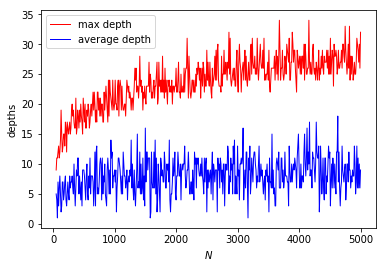

In [72]:
plt.plot(N, max_depths, color = 'red',label = 'max depth', linewidth = 1.0)
plt.plot(N, avg_depths, color = 'blue',label = 'average depth', linewidth = 1.0)
plt.xlabel('$N$', fontsize=10)
plt.ylabel('depths', fontsize=10)
plt.legend()
plt.show()

##### Apology
My apology professor for the incomplete work on the last PCW, I underestimated the time I will use to complete the preclass and I failed short on time. I promise it won't happen again and I will work harder in my class work. Thank you for understanding.